In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
%config InlineBackend.figure_format = 'svg'

In [3]:
def create_bell_pair(qc, a, b):
    qc.h(a)    #create superposition
    qc.cx(a,b)  #create entaglement

In [4]:
def encode_message(qc, qbit, msg):
    if msg == "00":
        pass        #do nothing i.e. Identity gate
    elif msg == "10":
        qc.x(qbit)  #apply X gate
    elif msg == "01":
        qc,z(qbit)  #apply Z gate
    elif msg == "11":
        qc.z(qbit)
        qc.x(qbit)
    else:
        print("Invalid message, Sending '00'")

In [5]:
def decode_message(qc, a, b):
    qc.cx(a,b)
    qc.h(a)

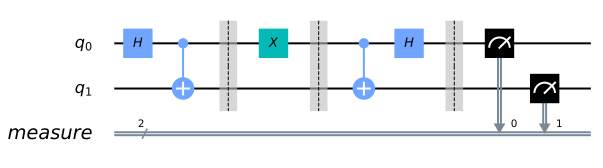

In [7]:
qc = QuantumCircuit(2)

create_bell_pair(qc, 0, 1)
qc.barrier()

msg = "10"
encode_message(qc, 0, msg)
qc.barrier()

decode_message(qc, 0, 1)

qc.measure_all()

qc.draw(output='mpl')

{'10': 1024}


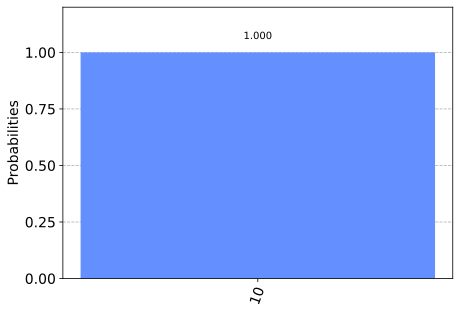

In [8]:
measurement_result = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots = 1024).result().get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

In [9]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 256
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend : ", backend)
job = execute(qc, backend = backend, shots=shots)

Credentials are already in use. The existing account in the session will be replaced.


least busy backend :  ibmq_london


In [10]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


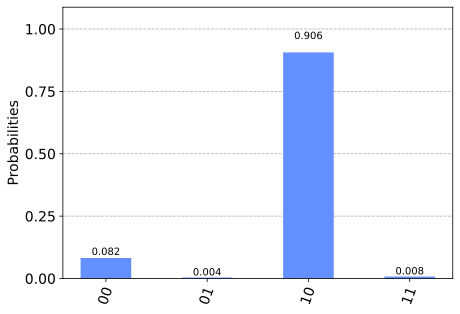

In [12]:
result  = job.result()
plot_histogram(result.get_counts(qc))

In [13]:
correct_results = result.get_counts(qc)[msg]
accuracy = (correct_results/shots)*100
print("Accuracy = %.2f%%" % accuracy)

Accuracy = 90.62%
